This script processes an image of a <strong>swimming pool</strong> and <strong>counts</strong> the number of pools in the image.

|__ Import OpenCV and Numpy libraries \
|__ Read input image \
|__ Convert input image to grayscale \
|__ Threshold the grayscale image to detect empty regions \
|__ Convert input image to HSV color space \
|__ Define the lower and upper bounds of the pool color in HSV \
|__ Create a binary mask by thresholding the image using the pool color bounds \
|__ Combine the pool mask and empty mask to create a final mask \
|__ Apply morphological opening to remove small noise and fill gaps in the mask \
|__ Find contours in the mask \
|__ Loop over each contour \
&nbsp; &nbsp; |   |__ Get the centroid of the contour \
&nbsp; &nbsp; |   |__ Draw the contour and pool number on the image \
&nbsp; &nbsp; |   |__ Increment pool number count \
|__ Display the number of pools \
|__ Display the image with the contours and pool numbers drawn \

These lines import the necessary libraries.

In [39]:
import cv2
import numpy as np
from IPython.display import display
import io
from PIL import Image
import matplotlib.pyplot as plt

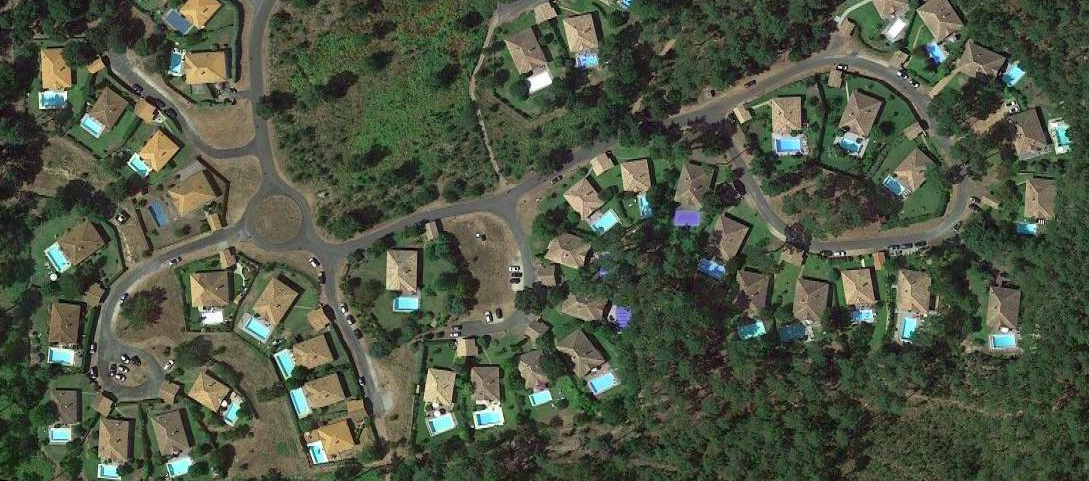

In [40]:
# Read the image
path = r"C:\Users\yaren\Desktop\moliets.png"
img = cv2.imread(path)
display(Image.open(path))

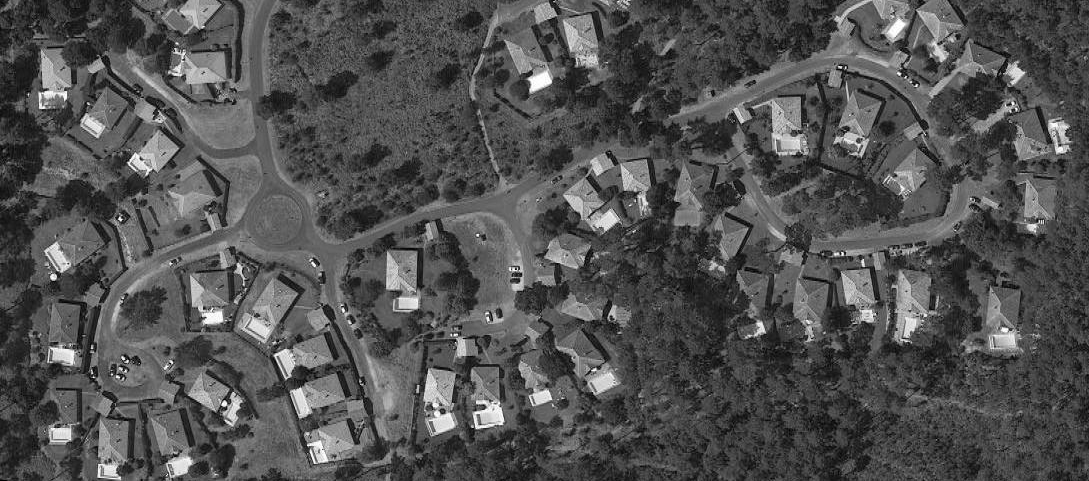

In [43]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Save the grayscale image
cv2.imwrite('gray_image.png', gray)
display(Image.open('gray_image.png'))

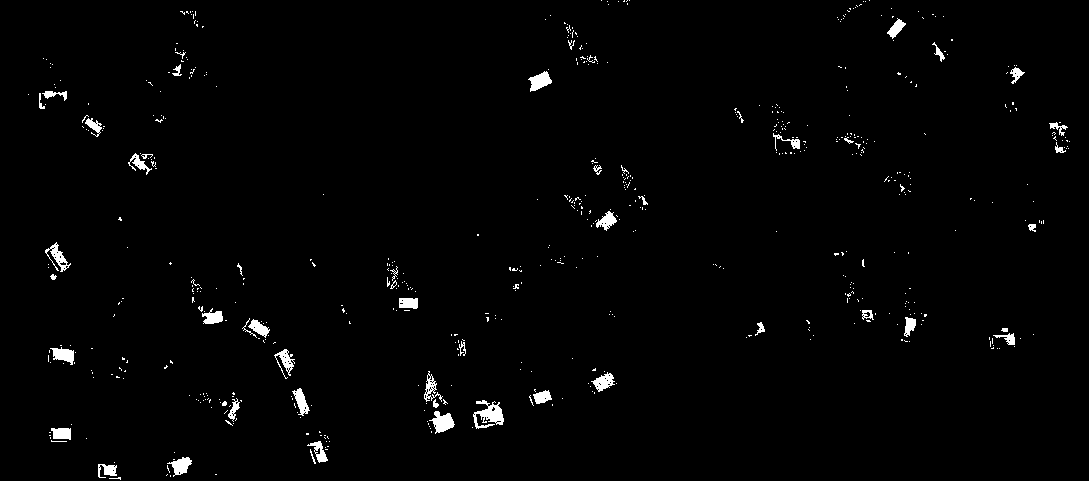

In [44]:
# Threshold the grayscale image to detect white regions
empty_mask = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)[1]

# Display threshold the grayscale image
cv2.imwrite('empty_mask.png', empty_mask)
display(Image.open('empty_mask.png'))

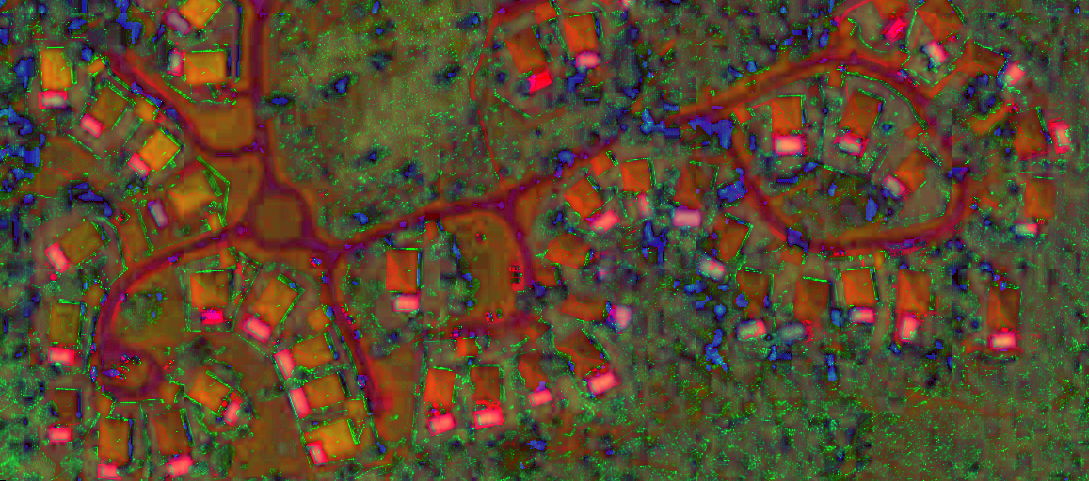

In [45]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Display HSV image
cv2.imwrite('hsv.png', hsv)
display(Image.open('hsv.png'))

Sure, here are the HSV values for blue, white, and green colors:

<strong>Blue:</strong> Hue = 120, Saturation = 100-255, Brightness = 50-255 \
<strong>White:</strong> Hue = 0-255, Saturation = 0-30, Brightness = 200-255 \
<strong>Green:</strong> Hue = 60, Saturation = 50-255, Brightness = 50-255 \
<strong>Purpule:</strong> Hue = 280-320, Saturation = 50-255, Brightness = 50-255 \

The pools are <strong>blue</strong> in color, but I think the part that looks <strong>purple</strong> is the protection or cover on the pool. so i tried to get common when selecting values



In [46]:
# Define the lower and upper bounds of the pool color in HSV
lower_color = np.array([85, 68, 50])
upper_color = np.array([320, 255, 255])


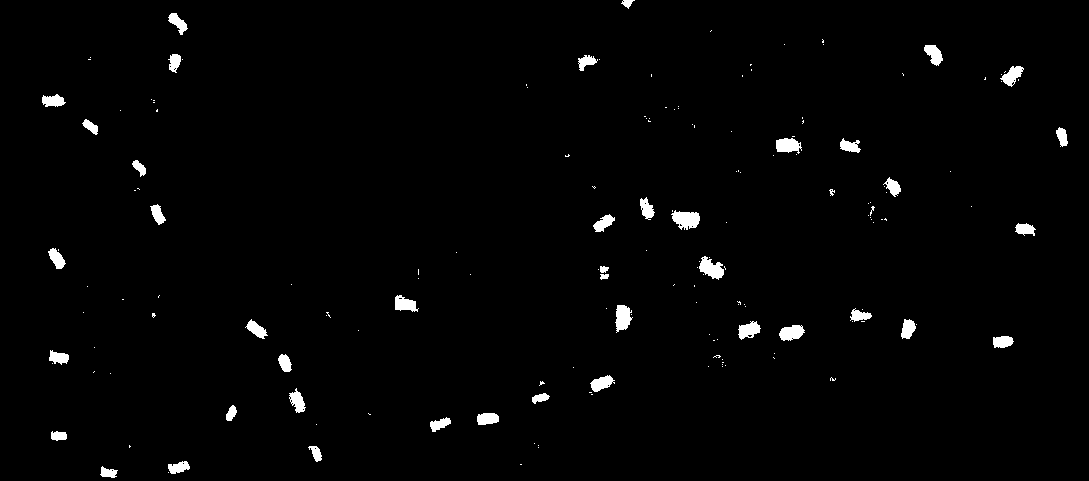

In [48]:
# Create a binary mask by thresholding the image using the pool color bounds
pool_mask = cv2.inRange(hsv, lower_color, upper_color)

# Display pool mask image
cv2.imwrite('pool_mask.png', pool_mask)
display(Image.open('pool_mask.png'))

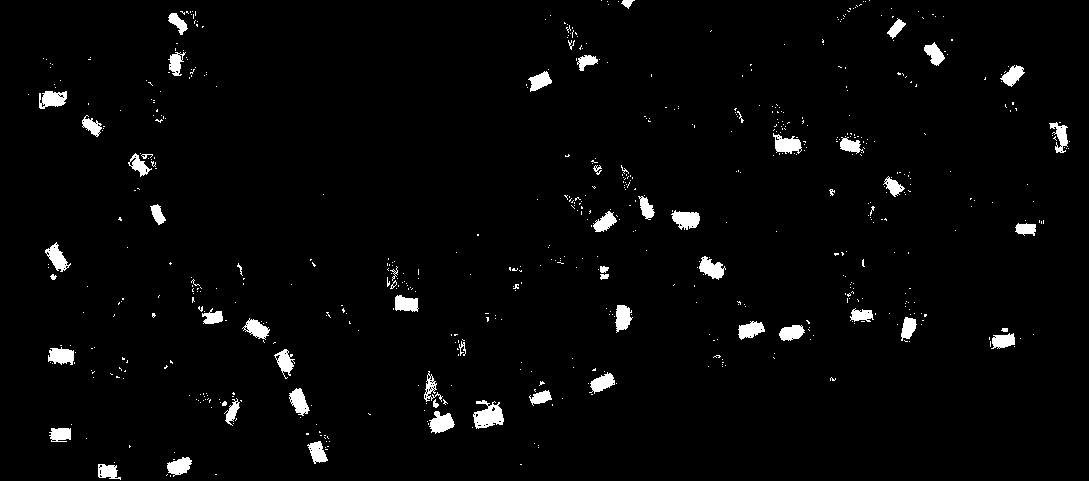

In [49]:
# Combine the pool mask and empty mask to create a final mask
#We can detect empty pools 
mask = cv2.bitwise_or(pool_mask, empty_mask)

# Display mask image
cv2.imwrite('mask.png', mask)
display(Image.open('mask.png'))

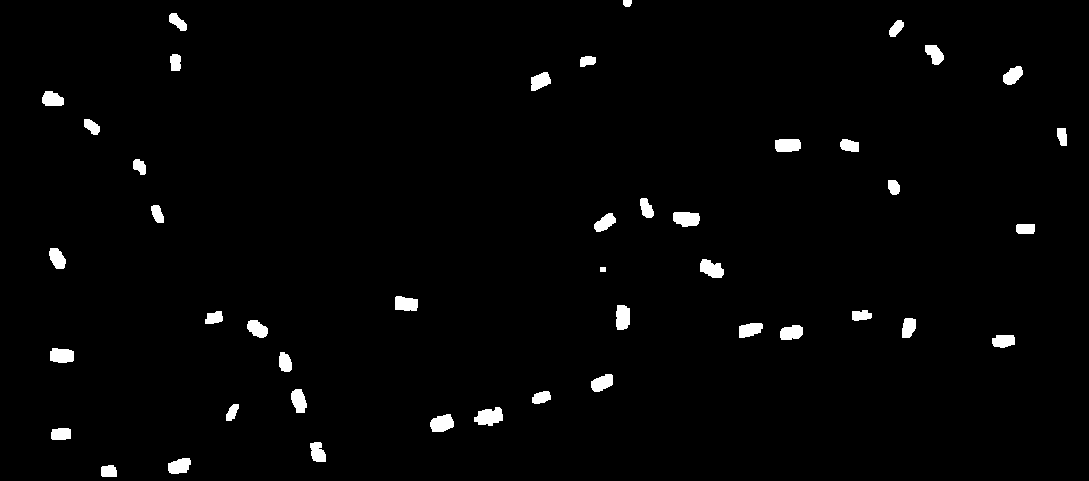

In [50]:
# Apply morphological opening to remove small noise and fill gaps in the mask
kernel = np.ones((5, 5), np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Display mask image
cv2.imwrite('mask.png', mask)
display(Image.open('mask.png'))

In [51]:
# Find contours in the mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [58]:
# Draw the contours on the original image and write pool number
for i, contour in enumerate(contours):
    # Get the centroid of the contour
    M = cv2.moments(contour)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Draw the contour and pool number on the image
    cv2.drawContours(img, [contour], 0, (0, 255, 0), 2)
    cv2.putText(img, str(i+1), (cX, cY), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)

In [59]:
# Count the number of contours
num_pools = len(contours)
# Display the number of pools
print("Number of pools:", num_pools)

Number of pools: 44


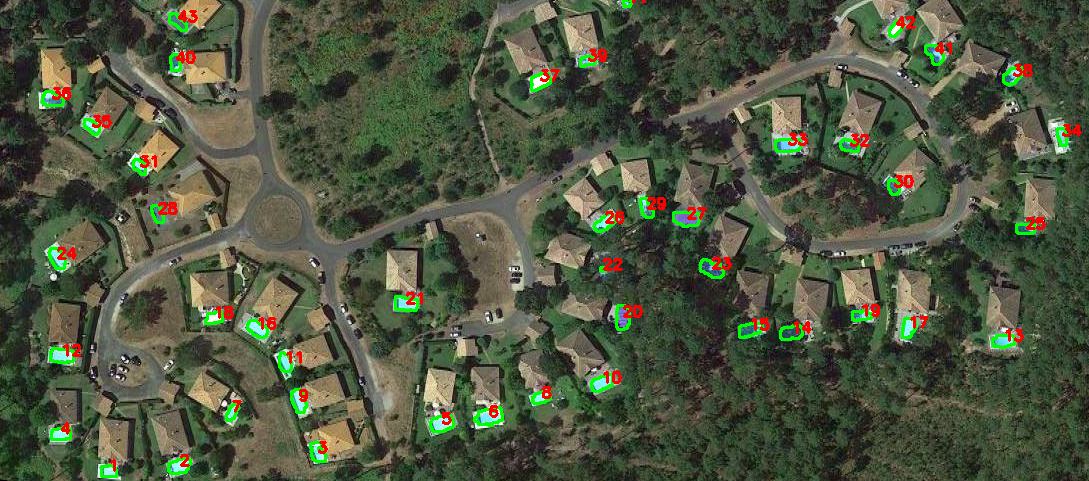

In [60]:
# Display the image with the contours and pool numbers drawn
# Display output image
cv2.imwrite('img_output.png', img)
display(Image.open('img_output.png'))